In [1]:
import numpy as np
import matplotlib.pyplot as plt

MODEL ROAD WITH UPHILLS AND DOWNHILLS USING POLYNOMIAL FUNCTION

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

class Road:
    """
    Road Object in a particle-based model with smooth elevation transitions using cubic splines.
    """
    
    def __init__(self, length, control_points):
        """
        Create a road using cubic splines for smooth elevation transitions.
        
        Args:
            length: Total length of the road (meters)
            control_points: List of (distance, elevation) pairs representing elevation waypoints.
        """
        self.length = length
        self.control_points = control_points  # List of (x, y) control points
    
    def generate_elevation(self):
        """
        Generate elevation points using cubic splines.
        Cubic splin consists of polynomials of the form:
            Si(x)=ai + b i (x − x i) + c i(x − x i)^2 + d i ( x − x i)^3
        """
        # Extract x and y values from control points
        x_values, y_values = zip(*self.control_points)
        
        # Create cubic spline interpolation to have smooth transistion between elevation waypoints
        spline = CubicSpline(x_values, y_values, bc_type='natural')
        
        # Generate smooth elevation values
        x_smooth = np.linspace(0, self.length, 80)
        y_smooth = spline(x_smooth)
        
        return x_smooth, y_smooth
    
    def plot_road(self):
        """
        Plot the road's elevation profile with smooth slopes using cubic splines.
        """
        x, y = self.generate_elevation()
        plt.figure(figsize=(10, 4))
        plt.plot(x, y, color='b', linestyle='-')
        plt.scatter(*zip(*self.control_points), color='r', label='Control Points')
        plt.xlabel("Distance (m)")
        plt.ylabel("Elevation (m)")
        plt.title("Road Elevation Profile with Smooth Splines")
        plt.legend()
        plt.grid(True)
        plt.show()
    
    def calculate_grade(self):
        """
        Calculate and return the grade of the road as a percentage.
        """
        x_values, y_values = self.generate_elevation()
        dy_dx = np.gradient(y_values, x_values)
        grades = (dy_dx * 100).tolist()  # Convert slope to percentage
        return grades

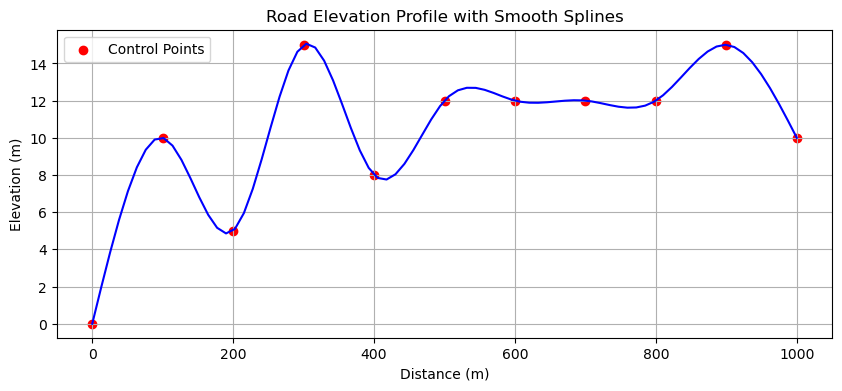

Road Grades:  [15.397697004180882, 15.134008826155435, 14.34294429207909, 13.024503401951867, 11.178686155773745, 8.805492553544724, 5.904922595264839, 2.4771197960628655, -1.2873277529688087, -4.632095322871743, -6.886680231730685, -7.9464599506251785, -7.811434479555235, -6.4816038185208535, -3.9569679675220155, -0.23923525750086938, 4.307719820869421, 8.513690572231514, 11.461303280662932, 13.041224765867504, 13.253455027845252, 12.09799406659615, 9.574841882120182, 5.689774721367891, 0.8954791971998333, -3.6035902336706727, -6.976509750662075, -9.149899623995928, -10.12375985367222, -9.898090439690977, -8.472891382052183, -5.858499111119481, -2.4670787876438505, 0.7775511246226552, 3.3185154398378494, 5.120928705524374, 6.184790921682259, 6.510102088311465, 6.096862205412002, 4.956020741876549, 3.3503649511290368, 1.783570402231982, 0.5184243486093976, -0.43412374084615957, -1.0740738661346116, -1.401426027256003, -1.4161802242102561, -1.1262543872476105, -0.6580421436941597, -0.22

In [4]:
# Example Usage
if __name__ == "__main__":
    # Define control points for a smooth road using splines
    control_points = [
        (0, 0), (100, 10), (200, 5), (300, 15), (400, 8), (500, 12),(600,12),(700,12),(800,12),(900,15),(1000,10)  # (distance, elevation)
    ]
    
    road = Road(1000, control_points)
    road.plot_road()
    print("Road Grades: ", road.calculate_grade())
